### Decision Tree Algorithm

**SVETLANA ULIANOVA** <br>
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

**METHODOLOGY**

* The dataset was extracted from Kaggle Dataset Repository.
* The dataset has 70,000 instances and with the following 13 features:


| Name           | Type
|----------------|-------------
| id             | Numeric 
| age            | Numeric 
| gender         | Categorical
| height         | Numeric 
| weight	     | Numeric
| ap_hi          | Numeric
| ap_lo          | Numeric 
| cholesterol    | Categorical
| gluc           | Categorical
| smoke          | Categorical
| alco	         | Categorical
| active         | Categorical
| cardio         | Categorical

* Python using pandas libraries is used in data cleaning and wrangling.
* matplotlib and seaborn libraries were used in visualization.

In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

%matplotlib inline

In [2]:
#Open/Read Dataset

data = pd.read_csv('cardio_train.csv')

# Printing the dataset shape
print ("Dataset Length: ", len(data))
print ("\nDataset Shape: ", data.shape)

Dataset Length:  70000

Dataset Shape:  (70000, 1)


In [3]:
#Display first 5 values

data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [4]:
#Data Cleaning/Wrangling

newdata = data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(';', expand=True)

newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
col_names = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',\
             'smoke', 'alco', 'active', 'cardio']

newdata.columns = col_names

newdata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
newdata['age'] = newdata['age'].astype(int)

newdata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
newdata['age'] = (newdata['age'].div(365).round(2))

newdata['age'] = newdata['age'].astype(int)

newdata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Printing the dataset shape
print ("Dataset Length: ", len(newdata))
print ("\nDataset Shape: ", newdata.shape)

Dataset Length:  70000

Dataset Shape:  (70000, 13)


In [9]:
#Summary of Data

newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  object
 1   age          70000 non-null  int32 
 2   gender       70000 non-null  object
 3   height       70000 non-null  object
 4   weight       70000 non-null  object
 5   ap_hi        70000 non-null  object
 6   ap_lo        70000 non-null  object
 7   cholesterol  70000 non-null  object
 8   gluc         70000 non-null  object
 9   smoke        70000 non-null  object
 10  alco         70000 non-null  object
 11  active       70000 non-null  object
 12  cardio       70000 non-null  object
dtypes: int32(1), object(12)
memory usage: 6.7+ MB


In [10]:
newdata['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [11]:
#Check for missing values

newdata.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
#Splitting feature and target variables

feature = newdata.drop(['cardio'], axis = 1)

target = newdata['cardio']

In [13]:
#Display first 5 values from the feature variables

feature.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50,2,168,62.0,110,80,1,1,0,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0


In [14]:
#Display first 5 values from the target variable

target.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: object

In [15]:
#Splitting the data into training and testing sets

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.30, random_state = 42)

In [16]:
#Test Size and Training set Info

print("SUMMARY OF SPLITTED TRAINING AND TEST SETS\n")

print('--Number of Training Set:',len(feature_train))

print('--Training Size:', len(feature_train)/len(data) * 100, '%')

print('\n--Number of Test Set:',len(feature_test))

print('--Test Size:', len(feature_test)/len(data) * 100, '%')

SUMMARY OF SPLITTED TRAINING AND TEST SETS

--Number of Training Set: 49000
--Training Size: 70.0 %

--Number of Test Set: 21000
--Test Size: 30.0 %


In [17]:
feature_train.shape, feature_test.shape

((49000, 12), (21000, 12))

In [18]:
#Feature Engineering

feature_train.dtypes

id             object
age             int32
gender         object
height         object
weight         object
ap_hi          object
ap_lo          object
cholesterol    object
gluc           object
smoke          object
alco           object
active         object
dtype: object

In [19]:
feature_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
68681,98125,55,1,160,64.0,120,90,3,1,0,0,1
19961,28510,62,2,167,65.0,120,80,3,3,0,0,0
11040,15795,62,1,160,66.0,120,90,1,1,0,0,1
27673,39560,62,1,163,55.0,125,90,3,1,0,0,1
22876,32677,59,1,158,85.0,150,80,3,1,0,0,1


In [20]:
feature_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46730,66728,59,1,156,64.0,140,80,2,1,0,0,1
48393,69098,59,1,170,85.0,160,90,1,1,0,0,1
41416,59185,63,1,151,90.0,130,80,1,1,0,0,1
34506,49288,54,1,159,97.0,120,80,1,1,0,0,1
43725,62481,50,1,164,68.0,120,80,1,1,0,0,1


In [21]:
#Creating Decision Tree Classifier Object using Entropy

clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 42)

#Fitting the Model

clf_ent.fit(feature_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [22]:
#Predicting the test set

target_pred_ent = clf_ent.predict(feature_test)

target_pred_ent

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [23]:
#Predicting using train set

target_pred_train_ent = clf_ent.predict(feature_train)

target_pred_train_ent

array(['1', '1', '0', ..., '0', '0', '0'], dtype=object)

In [24]:
#Checking accuracy of Training Set and Testing Set to check Overfitting

print('Model Accuracy for Testing Set: {0:0.4f}'. format(accuracy_score(target_test, target_pred_ent)))

print('\nModel Accuracy for Training Set: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train_ent)))

Model Accuracy for Testing Set: 0.7283

Model Accuracy for Training Set: 0.7213


In [25]:
#Comparing Null Accuracy and Model Accuracy

target_test.describe()

count     21000
unique        2
top           1
freq      10539
Name: cardio, dtype: object

In [26]:
#Comparing Null Accuracy and Model Accuracy

null_acc = target_test.describe()[3] / target_test.describe()[0]

print('Model Accuracy: {0:0.4f}'. format(accuracy_score(target_test, target_pred_ent)))

print('\nNull Accuracy: {0:0.4f}'. format(null_acc))

Model Accuracy: 0.7283

Null Accuracy: 0.5019


[Text(502.20000000000005, 285.39000000000004, 'X[5] <= 129.5\nentropy = 1.0\nsamples = 49000\nvalue = [24560, 24440]'),
 Text(251.10000000000002, 203.85000000000002, 'X[1] <= 54.5\nentropy = 0.904\nsamples = 29027\nvalue = [19742, 9285]'),
 Text(125.55000000000001, 122.31, 'X[7] <= 1.5\nentropy = 0.796\nsamples = 18067\nvalue = [13724, 4343]'),
 Text(62.775000000000006, 40.76999999999998, 'entropy = 0.743\nsamples = 15374\nvalue = [12131, 3243]'),
 Text(188.32500000000002, 40.76999999999998, 'entropy = 0.976\nsamples = 2693\nvalue = [1593, 1100]'),
 Text(376.65000000000003, 122.31, 'X[7] <= 2.5\nentropy = 0.993\nsamples = 10960\nvalue = [6018, 4942]'),
 Text(313.875, 40.76999999999998, 'entropy = 0.983\nsamples = 9839\nvalue = [5681, 4158]'),
 Text(439.42500000000007, 40.76999999999998, 'entropy = 0.882\nsamples = 1121\nvalue = [337, 784]'),
 Text(753.3000000000001, 203.85000000000002, 'X[5] <= 138.5\nentropy = 0.797\nsamples = 19973\nvalue = [4818, 15155]'),
 Text(627.75, 122.31, 'X[7

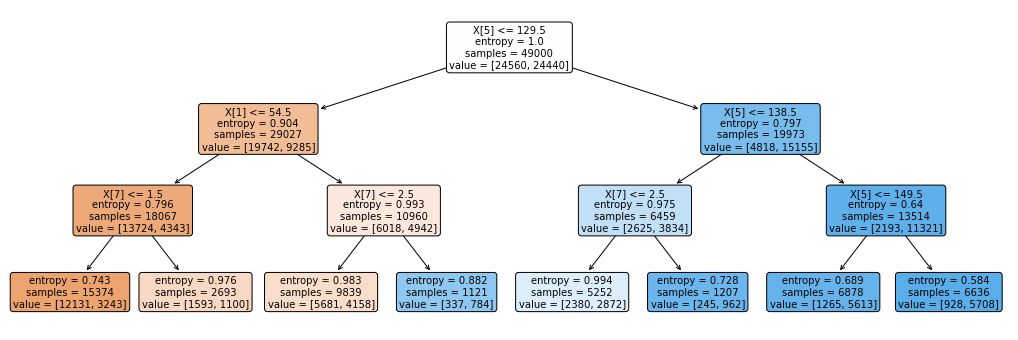

In [28]:
#Visualization

plt.figure(figsize = (18, 6))

tree.plot_tree(clf_ent.fit(feature_train, target_train), filled = True, impurity = True, rounded = True)

In [35]:
#Confusion Matrix

cm = confusion_matrix(target_pred_ent, target_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8272 3516]
 [2189 7023]]

True Positives(TP) =  8272

True Negatives(TN) =  7023

False Positives(FP) =  3516

False Negatives(FN) =  2189


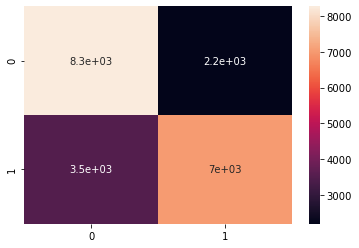

In [30]:
#Visualization of Confusion Matrix

sns.heatmap(cm, annot = True)
plt.savefig('cm.png')

In [32]:
#Evaluation Metrics Report

print(classification_report(target_test, target_pred_ent, zero_division = 0))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10461
           1       0.76      0.67      0.71     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

